<a href="https://colab.research.google.com/github/dipucriodigital/ciencia-de-dados-e-analytics/blob/main/machine-learning/ML_Aula3b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MVP - Machine Learning - Wesley Mininel

Sprint 2 - Qualidade de Software, Segurança e Sistemas Inteligentes (40530010063_20240_01)

DataSet - Heart Failure Clinical Records (https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records)

## Configuração do ambiente

In [1]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

## Carga do Dataset

O dataset contém um conjunto de dados de 299 pacientes com insuficiência cardíaca coletados em 2015 mostra que a creatinina sérica e a fração de ejeção são suficientes para prever a sobrevivência de pacientes com insuficiência cardíaca a partir de registros médicos, e que usar esses dois recursos isoladamente pode levar a previsões mais precisas do que usar os recursos do conjunto de dados original em sua totalidade.

Descrição de Cada Couna
- age: idade do paciente
- anaemia: diminuição de hemácias ou hemoglobina
- creatinine_phosphokinase (CPK): nível da enzima CPK no sangue (mcg/L)
- diabetes: se o paciente tem diabetes
- ejection_fraction: porcentagem de sangue que sai do coração a cada contração
- high_blood_pressure: se o paciente tem hipertensão
- platelets: plaquetas no sangue (quiloplaquetas/mL)
- serum_creatinine: nível de creatinina sérica no sangue (mg/dL)
- serum_sodium: nível de sódio sérico no sangue (mEq/L)
- sex: mulher ou homem
- smoking: se o paciente fuma ou não
- time: período de acompanhamento
- death_event: se o paciente morreu durante o período de acompanhamento

O objetivo é prever a sobrevivência de pacientes com insuficiência cardíaca.

In [2]:
# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/wesleymininel/machine-learning/main/heart_failure_clinical_records_dataset.csv"

# Lê o arquivo
dataset = pd.read_csv(url, delimiter=',')

# Mostra as primeiras linhas do dataset
dataset.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


## Separação em conjunto de treino e conjunto de teste com holdout

In [4]:
test_size = 0.20 # tamanho do conjunto de teste
seed = 7 # semente aleatória

# Separação em conjuntos de treino e teste
array = dataset.values
X = array[:,0:12]
y = array[:,12]
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

## Modelagem e Inferência

### Criação e avaliação de modelos: linha base

LR: 0.824275 (0.080749)
KNN: 0.665217 (0.045850)
CART: 0.732428 (0.052430)
NB: 0.786051 (0.075721)
SVM: 0.677899 (0.017467)
Bagging: 0.807609 (0.046057)
RF: 0.832609 (0.067221)
ET: 0.803080 (0.079973)
Ada: 0.803442 (0.061638)
GB: 0.799275 (0.051621)
Voting: 0.811594 (0.062860)


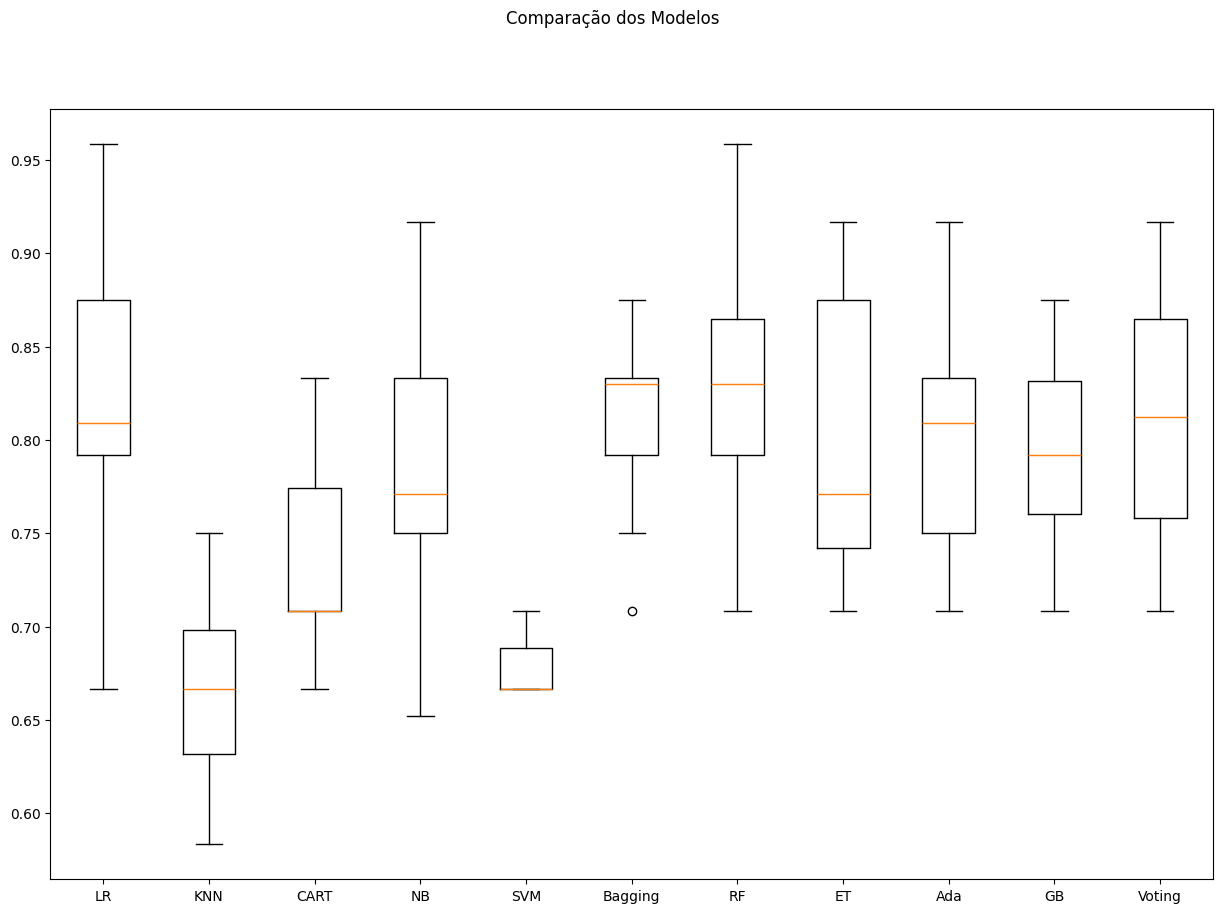

In [5]:
np.random.seed(7) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=200))) 
models.append(('KNN', KNeighborsClassifier())) 
models.append(('CART', DecisionTreeClassifier())) 
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos (treinamento)
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10)) 
fig.suptitle('Comparação dos Modelos') 
ax = fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names) 
plt.show()

### Criação e avaliação de modelos: dados padronizados e normalizados

Trabalhando com dados pontencialmente desbalanceados ou sensíveis a escala

StandardScaler (padronização do conjunto de dados) e MinMaxScaler (normalização do conjunto de dados) são duas técnicas de normalização/escala usadas em machine learning para pré-processamento de dados e são úteis para preparar dados para algoritmos de aprendizado de máquina que são sensíveis à escala dos dados.

##### StandardScaler
StandardScaler padroniza os dados, ou seja, remove a média e escala os dados para que tenham uma variância unitária. Ele transforma os dados para que a média de cada feature seja 0 e a variância seja 1.

Fórmula: $z_i=\frac{x_i-\mu}{\sigma}$

 
onde:
- $x_i$ é o valor original do $i$-ésimo termo da feature.
- $\mu$ é a média dos valores da feature.
- $\sigma$ é o desvio padrão dos valores da feature.
𝑥
x é o valor original da feature.
𝜇
μ é a média dos valores da feature.
𝜎
σ é o desvio padrão dos valores da feature.


##### MinMaxScaler
MinMaxScaler escala e transforma os dados para um intervalo específico, geralmente entre 0 e 1. Ele transforma os dados para que o menor valor de uma feature seja 0 e o maior valor seja 1.

Fórmula: $z_i=\frac{x_i-min(x)}{max(x)-min(x)}$

onde:
- $x_i$ é o valor original do $i$-ésimo termo da feature.
- $min(x)$ é o menor valor da feature.
- $max(x)$ é o maior valor da feature.

Nós vamos aplicar essas técnicas para os dados do dataset de insuficiência cardíacas através da construção de pipelines. Pipelines são uma maneira de simplificar o processo de construção de modelos, permitindo que você execute várias etapas de pré-processamento e modelagem em sequência.

LR-orig: 0.824 (0.081)
KNN-orig: 0.665 (0.046)
CART-orig: 0.732 (0.052)
NB-orig: 0.786 (0.076)
SVM-orig: 0.678 (0.017)
Bag-orig: 0.808 (0.046)
RF-orig: 0.833 (0.067)
ET-orig: 0.803 (0.080)
Ada-orig: 0.803 (0.062)
GB-orig: 0.799 (0.052)
Vot-orig: 0.812 (0.063)
LR-padr: 0.824 (0.080)
KNN-padr: 0.770 (0.054)
CART-padr: 0.728 (0.050)
NB-padr: 0.761 (0.069)
SVM-padr: 0.803 (0.078)
Bag-padr: 0.812 (0.056)
RF-padr: 0.833 (0.065)
ET-padr: 0.824 (0.093)
Ada-padr: 0.803 (0.062)
GB-padr: 0.808 (0.046)
Vot-padr: 0.807 (0.071)
LR-norm: 0.803 (0.062)
KNN-norm: 0.703 (0.050)
CART-norm: 0.732 (0.059)
NB-norm: 0.761 (0.069)
SVM-norm: 0.787 (0.082)
Bag-norm: 0.808 (0.059)
RF-norm: 0.833 (0.070)
ET-norm: 0.807 (0.085)
Ada-norm: 0.803 (0.062)
GB-norm: 0.808 (0.042)
Vot-norm: 0.816 (0.056)


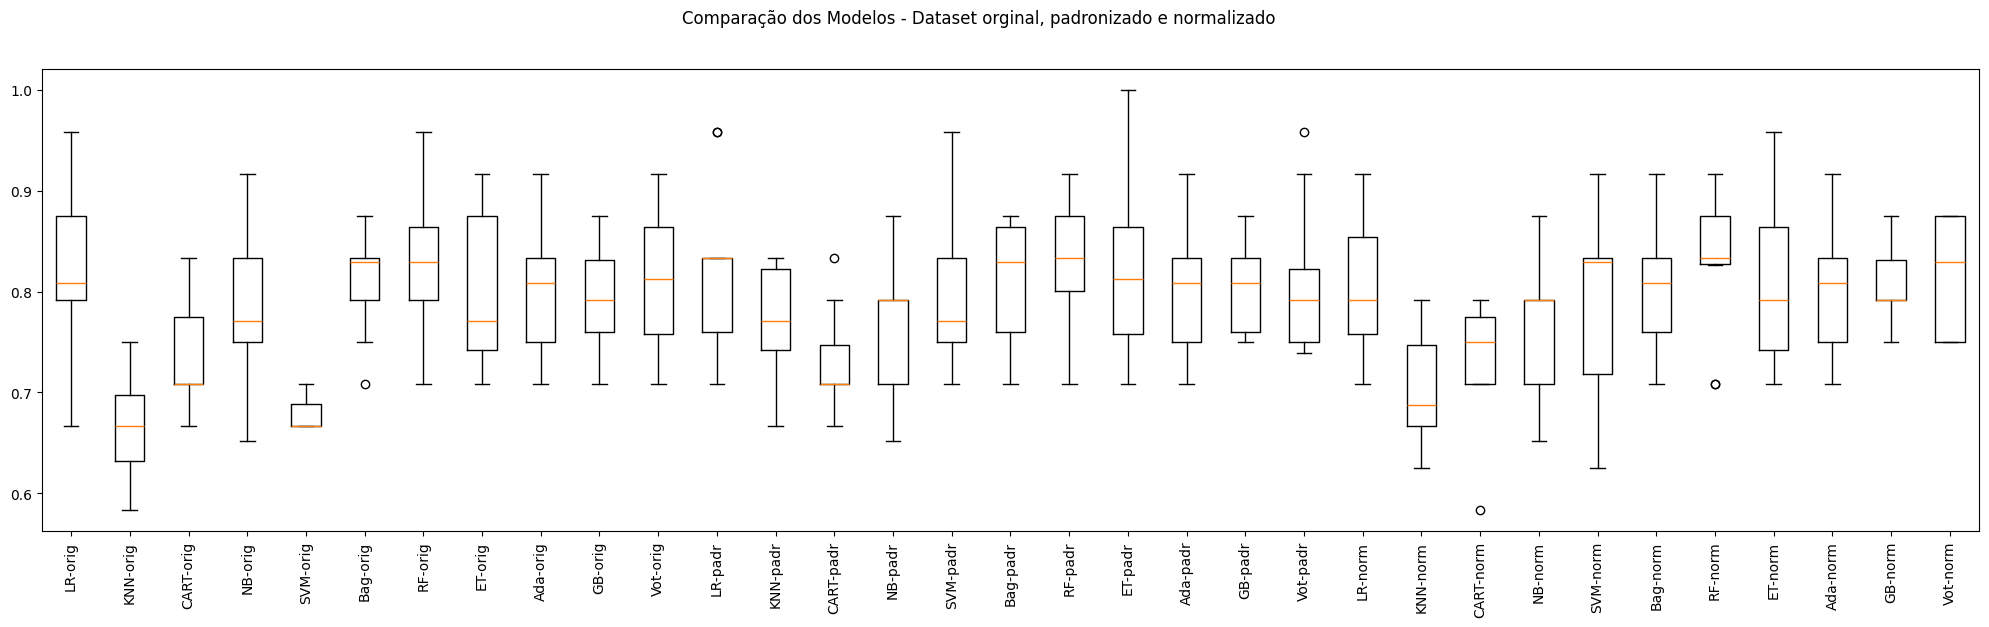

In [6]:
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines
# A ordem de execução é da esquerda para a direita.

# Dataset original
pipelines.append(('LR-orig', Pipeline([reg_log]))) 
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log]))) 
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging]))) 
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log]))) 
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging]))) 
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado') 
ax = fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names, rotation=90)
plt.show()

### Otimização dos hiperparâmetros

A otimização de hiperparâmetros é o processo de encontrar os valores ideais para os hiperparâmetros de um modelo de machine learning. O objetivo é encontrar a combinação de hiperparâmetros que resulta no melhor desempenho do modelo.


##### Grid Search (*força bruta*)

Como Funciona o Grid Search?
1. Definição do Espaço de Hiperparâmetros: Primeiro, define-se um conjunto de valores possíveis para cada hiperparâmetro.
2. Avaliação das Combinações: Em seguida, cada combinação possível desses valores é avaliada.
3. Seleção do Melhor Conjunto: A combinação de hiperparâmetros que produz o melhor desempenho é selecionada.

In [7]:
np.random.seed(7)  # Definindo uma semente global para este bloco

# Lista de modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=200))) 
models.append(('KNN', KNeighborsClassifier())) 
models.append(('CART', DecisionTreeClassifier())) 
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(estimators=bases, voting='hard')))

# Definindo os componentes do pipeline
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

# Lista de pipelines
pipelines = []

# Criando pipelines para cada modelo
for name, model in models:
    pipelines.append((name + '-orig', Pipeline(steps=[(name, model)])))
    pipelines.append((name + '-padr', Pipeline(steps=[standard_scaler, (name, model)])))
    pipelines.append((name + '-norm', Pipeline(steps=[min_max_scaler, (name, model)])))

# Definindo os parâmetros para GridSearchCV
param_grids = {
   'LR': {
      'LR__C': [0.01, 0.1, 1, 10, 100],
        'LR__solver': ['liblinear', 'saga']
    },
    'KNN': {
        'KNN__n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21],
        'KNN__metric': ["euclidean", "manhattan", "minkowski"]
    },
    'CART': {
        'CART__max_depth': [None, 10, 20, 30, 40, 50],
        'CART__min_samples_split': [2, 5, 10],
        'CART__min_samples_leaf': [1, 2, 4]
    },
    'NB': {
        'NB__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
    },
    'SVM': {
        'SVM__C': [0.1, 1, 10, 100],
        'SVM__gamma': [1, 0.1, 0.01, 0.001],
        'SVM__kernel': ['rbf']
    },
    'RF': {
        'RF__n_estimators': [10, 50, 100, 200],
        'RF__max_features': ['auto', 'sqrt', 'log2'],
        'RF__max_depth': [None, 10, 20, 30],
        'RF__min_samples_split': [2, 5, 10],
        'RF__min_samples_leaf': [1, 2, 4]
    },
    'ET': {
        'ET__n_estimators': [10, 50, 100, 200],
        'ET__max_features': ['auto', 'sqrt', 'log2'],
        'ET__max_depth': [None, 10, 20, 30],
        'ET__min_samples_split': [2, 5, 10],
       'ET__min_samples_leaf': [1, 2, 4]
    },
    'Ada': {
        'Ada__n_estimators': [10, 50, 100, 200],
        'Ada__learning_rate': [0.01, 0.1, 1, 10]
    },
    'GB': {
        'GB__n_estimators': [10, 50, 100, 200],
        'GB__learning_rate': [0.01, 0.1, 0.2, 0.3],
        'GB__max_depth': [3, 5, 7, 9]
    },
   'Voting': {
        # Para VotingClassifier, geralmente não há hiperparâmetros para ajustar diretamente
        # Ajustar os hiperparâmetros dos estimadores base individualmente se necessário
    }
}

# Parâmetros de cross-validation e scoring
scoring = 'accuracy'
kfold = 5

# Executando o GridSearchCV para cada pipeline
for name, pipeline in pipelines:
    model_type = name.split('-')[0]
    if model_type in param_grids:
        param_grid = param_grids[model_type]
    else:
        param_grid = {}  # Para modelos que não têm parâmetros definidos

    grid = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # Imprimindo a melhor configuração
    print("Modelo: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))
    
#It took 32min


Modelo: LR-orig - Melhor: 0.820213 usando {'LR__C': 100, 'LR__solver': 'liblinear'}
Modelo: LR-padr - Melhor: 0.816135 usando {'LR__C': 0.01, 'LR__solver': 'liblinear'}
Modelo: LR-norm - Melhor: 0.812057 usando {'LR__C': 100, 'LR__solver': 'liblinear'}
Modelo: KNN-orig - Melhor: 0.677837 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 9}
Modelo: KNN-padr - Melhor: 0.761791 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 15}
Modelo: KNN-norm - Melhor: 0.728280 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 11}
Modelo: CART-orig - Melhor: 0.803457 usando {'CART__max_depth': 20, 'CART__min_samples_leaf': 2, 'CART__min_samples_split': 10}
Modelo: CART-padr - Melhor: 0.807624 usando {'CART__max_depth': 10, 'CART__min_samples_leaf': 2, 'CART__min_samples_split': 10}
Modelo: CART-norm - Melhor: 0.811791 usando {'CART__max_depth': None, 'CART__min_samples_leaf': 2, 'CART__min_samples_split': 10}
Modelo: NB-orig - Melhor: 0.799113 usando {'NB__var_smoothing': 1e-08}
Mod

In [8]:
# Saida do resultado da otimização dos  hiperparâmetros
# Modelo: LR-orig - Melhor: 0.820213 usando {'LR__C': 100, 'LR__solver': 'liblinear'}
# Modelo: LR-padr - Melhor: 0.816135 usando {'LR__C': 0.01, 'LR__solver': 'liblinear'}
# Modelo: LR-norm - Melhor: 0.812057 usando {'LR__C': 100, 'LR__solver': 'liblinear'}
# Modelo: KNN-orig - Melhor: 0.677837 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 9}
# Modelo: KNN-padr - Melhor: 0.761791 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 15}
# Modelo: KNN-norm - Melhor: 0.728280 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 11}
# Modelo: CART-orig - Melhor: 0.803457 usando {'CART__max_depth': 20, 'CART__min_samples_leaf': 2, 'CART__min_samples_split': 10}
# Modelo: CART-padr - Melhor: 0.807624 usando {'CART__max_depth': 10, 'CART__min_samples_leaf': 2, 'CART__min_samples_split': 10}
# Modelo: CART-norm - Melhor: 0.811791 usando {'CART__max_depth': None, 'CART__min_samples_leaf': 2, 'CART__min_samples_split': 10}
# Modelo: NB-orig - Melhor: 0.799113 usando {'NB__var_smoothing': 1e-08}
# Modelo: NB-padr - Melhor: 0.761525 usando {'NB__var_smoothing': 1e-09}
# Modelo: NB-norm - Melhor: 0.761525 usando {'NB__var_smoothing': 1e-09}
# Modelo: SVM-orig - Melhor: 0.686170 usando {'SVM__C': 10, 'SVM__gamma': 0.001, 'SVM__kernel': 'rbf'}
# Modelo: SVM-padr - Melhor: 0.799379 usando {'SVM__C': 10, 'SVM__gamma': 0.001, 'SVM__kernel': 'rbf'}
# Modelo: SVM-norm - Melhor: 0.795479 usando {'SVM__C': 100, 'SVM__gamma': 0.1, 'SVM__kernel': 'rbf'}
# Modelo: Bagging-orig - Melhor: 0.807535 usando {}
# Modelo: Bagging-padr - Melhor: 0.803280 usando {}
# Modelo: Bagging-norm - Melhor: 0.815869 usando {}
# Modelo: RF-orig - Melhor: 0.857890 usando {'RF__max_depth': 20, 'RF__max_features': 'log2', 'RF__min_samples_leaf': 4, 'RF__min_samples_split': 10, 'RF__n_estimators': 100}
# Modelo: RF-padr - Melhor: 0.862057 usando {'RF__max_depth': 20, 'RF__max_features': 'sqrt', 'RF__min_samples_leaf': 4, 'RF__min_samples_split': 2, 'RF__n_estimators': 50}
#### Modelo: RF-norm - Melhor: 0.870390 usando {'RF__max_depth': 20, 'RF__max_features': 'sqrt', 'RF__min_samples_leaf': 2, 'RF__min_samples_split': 2, 'RF__n_estimators': 10}
# Modelo: ET-orig - Melhor: 0.836968 usando {'ET__max_depth': None, 'ET__max_features': 'sqrt', 'ET__min_samples_leaf': 2, 'ET__min_samples_split': 10, 'ET__n_estimators': 100}
# Modelo: ET-padr - Melhor: 0.837057 usando {'ET__max_depth': 10, 'ET__max_features': 'sqrt', 'ET__min_samples_leaf': 1, 'ET__min_samples_split': 10, 'ET__n_estimators': 200}
# Modelo: ET-norm - Melhor: 0.837057 usando {'ET__max_depth': 10, 'ET__max_features': 'sqrt', 'ET__min_samples_leaf': 2, 'ET__min_samples_split': 10, 'ET__n_estimators': 100}
# Modelo: Ada-orig - Melhor: 0.853723 usando {'Ada__learning_rate': 0.1, 'Ada__n_estimators': 50}
# Modelo: Ada-padr - Melhor: 0.853723 usando {'Ada__learning_rate': 0.1, 'Ada__n_estimators': 50}
# Modelo: Ada-norm - Melhor: 0.853723 usando {'Ada__learning_rate': 0.1, 'Ada__n_estimators': 50}
# Modelo: GB-orig - Melhor: 0.853723 usando {'GB__learning_rate': 0.2, 'GB__max_depth': 5, 'GB__n_estimators': 100}
# Modelo: GB-padr - Melhor: 0.832801 usando {'GB__learning_rate': 0.01, 'GB__max_depth': 3, 'GB__n_estimators': 100}
# Modelo: GB-norm - Melhor: 0.836879 usando {'GB__learning_rate': 0.3, 'GB__max_depth': 5, 'GB__n_estimators': 50}
# Modelo: Voting-orig - Melhor: 0.794947 usando {}
# Modelo: Voting-padr - Melhor: 0.791135 usando {}
# Modelo: Voting-norm - Melhor: 0.799468 usando {}

In [9]:
# Tuning do RF-norm

np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
rf = ('RF', RandomForestClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('rf-orig', Pipeline(steps=[rf])))
pipelines.append(('rf-padr', Pipeline(steps=[standard_scaler, rf])))
pipelines.append(('rfnorm', Pipeline(steps=[min_max_scaler, rf])))

param_grid = {
        'RF__n_estimators': [10],
        'RF__max_features': ['sqrt'],
        'RF__max_depth': [20],
        'RF__min_samples_split': [2],
        'RF__min_samples_leaf': [2]
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:    
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_)) 

Sem tratamento de missings: rf-orig - Melhor: 0.841401 usando {'RF__max_depth': 20, 'RF__max_features': 'sqrt', 'RF__min_samples_leaf': 2, 'RF__min_samples_split': 2, 'RF__n_estimators': 10}
Sem tratamento de missings: rf-padr - Melhor: 0.836968 usando {'RF__max_depth': 20, 'RF__max_features': 'sqrt', 'RF__min_samples_leaf': 2, 'RF__min_samples_split': 2, 'RF__n_estimators': 10}
Sem tratamento de missings: rfnorm - Melhor: 0.832890 usando {'RF__max_depth': 20, 'RF__max_features': 'sqrt', 'RF__min_samples_leaf': 2, 'RF__min_samples_split': 2, 'RF__n_estimators': 10}


## Finalização do Modelo

In [10]:
# Avaliação do modelo com o conjunto de testes
# Melhor modelo
# RF-norm - Melhor: 0.870390 usando {'RF__max_depth': 20, 'RF__max_features': 'sqrt', 'RF__min_samples_leaf': 2, 'RF__min_samples_split': 2, 'RF__n_estimators': 10}

np.random.seed(7)

# Preparação do modelo
scaler = MinMaxScaler().fit(X_train)
rescaledX = scaler.transform(X_train) # aplicação da normalização no conjunto de treino
model = RandomForestClassifier(n_estimators=10, 
                               max_features='sqrt',
                               min_samples_split=2,
                               max_depth=20,
                               min_samples_leaf=2)
model.fit(rescaledX, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da normalização no conjunto de teste
predictions = model.predict(rescaledTestX)
print(accuracy_score(y_test, predictions))

0.8166666666666667


Rodando o modelo a partir de um pipeline com os hiperparâmetros otimizados.

In [11]:
np.random.seed(7)

model = RandomForestClassifier(n_estimators=10, 
                               max_features='sqrt',
                               min_samples_split=2,
                               max_depth=20,
                               min_samples_leaf=2)

pipeline = Pipeline(steps=[('MinMaxScaler', MinMaxScaler()), ('RF', model)])

pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)
print(accuracy_score(y_test, predictions))

0.8166666666666667


## Salvando os arquivos

In [12]:
# Salvando o modelo
model_filename = 'rf_hfcr_classifier.pkl'
with open("../models/"+model_filename, 'wb') as file:
    pickle.dump(model, file)

# Salvando o scaler
scaler_filename = 'minmax_scaler_hfcr.pkl'
with open("../scalers/"+scaler_filename, 'wb') as file:
    pickle.dump(scaler, file)
    
# Salvando o pipeline
pipeline_filename = 'rf_hfcr_pipeline.pkl'
with open("../pipelines/"+pipeline_filename, 'wb') as file:
    pickle.dump(pipeline, file)
    
# Salvando X_test e y_test
X_test_df = pd.DataFrame(X_test, columns=dataset.columns[:-1])
y_test_df = pd.DataFrame(y_test, columns=[dataset.columns[-1]])
# Trazer isso no Github
dataset = pd.concat([X_test_df, y_test_df], axis=1)
dataset.to_csv("../data/test_dataset_hfcr.csv", index=False)
X_test_df.to_csv("../data/X_test_dataset_hfcr.csv", index=False)
y_test_df.to_csv("../data/y_test_dataset_hfcr.csv", index=False)


## Simulando a aplicação do modelo em dados não vistos

In [13]:
# Preparação do modelo com TODO o dataset
scaler = MinMaxScaler().fit(X) # ajuste do scaler com TODO o dataset
rescaledX = scaler.transform(X) # aplicação da normalização com TODO o dataset
model.fit(rescaledX, y)

RandomForestClassifier(max_depth=20, min_samples_leaf=2, n_estimators=10)

In [16]:
# Novos dados - não sabemos a classe!
data = {'age': [70, 40, 75],
'anaemia': [1, 0, 0],
'creatinine_phosphokinase': [143, 90, 675],
'diabetes': [0, 0, 1],
'ejection_fraction': [60, 35, 60],
'high_blood_pressure': [0, 0, 0],
'platelets': [351000, 255000, 265000],
'serum_creatinine': [1.3, 1.1, 1.4],
'serum_sodium': [137, 136, 125],
'sex': [0, 1, 0],
'smoking': [0, 1, 0],
'time': [90, 212, 205]
        }

atributos = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']
entrada = pd.DataFrame(data, columns=atributos)

array_entrada = entrada.values
X_entrada = array_entrada[:,0:12].astype(float)

# Padronização nos dados de entrada usando o scaler utilizado em X
rescaledEntradaX = scaler.transform(X_entrada)
print(rescaledEntradaX)

[[0.54545455 1.         0.01531003 0.         0.6969697  0.
  0.39507819 0.08988764 0.68571429 0.         0.         0.30604982]
 [0.         0.         0.0085481  0.         0.31818182 0.
  0.27870045 0.06741573 0.65714286 1.         1.         0.74021352]
 [0.63636364 0.         0.08318449 1.         0.6969697  0.
  0.29082313 0.1011236  0.34285714 0.         0.         0.71530249]]


In [15]:
# Predição de classes dos dados de entrada
saidas = model.predict(rescaledEntradaX)
print(saidas)

[0. 0. 0.]


## Conclusão

Optamos pelo RandomForestClassifier com os parâmetros max_depth=20, min_samples_leaf=2 e n_estimators=10, com base nos resultados do GridSearchCV, que identificou este modelo como o de melhor desempenho em termos de acurácia.

Nos testes realizados, as métricas de avaliação apresentaram consistência, sem sinais de desbalanceamento, o que indica ausência de overfitting.
